In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolorsx
from matplotlib.patches import Circle

import os
from glob import glob

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.nddata import Cutout2D

from reproject import reproject_exact

from AstroColour.AstroColour import RGB

import matplotlib.patheffects as patheffects

%matplotlib widget

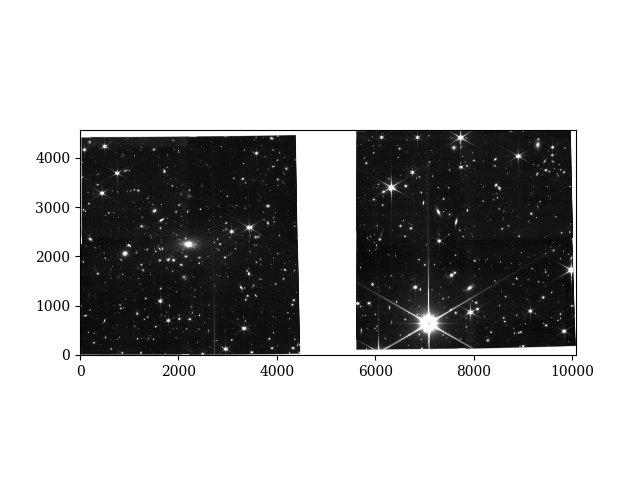

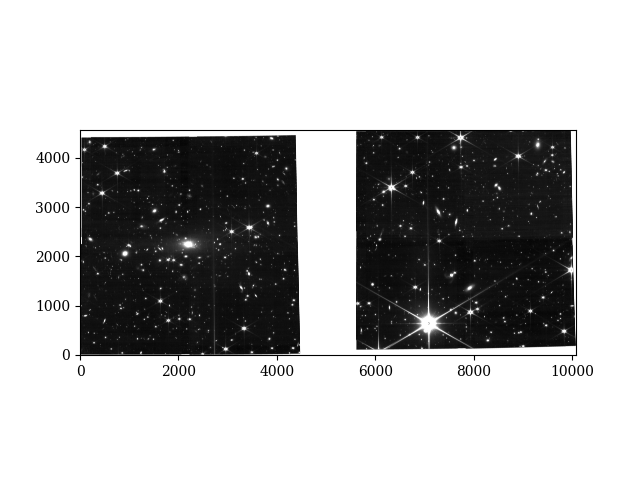

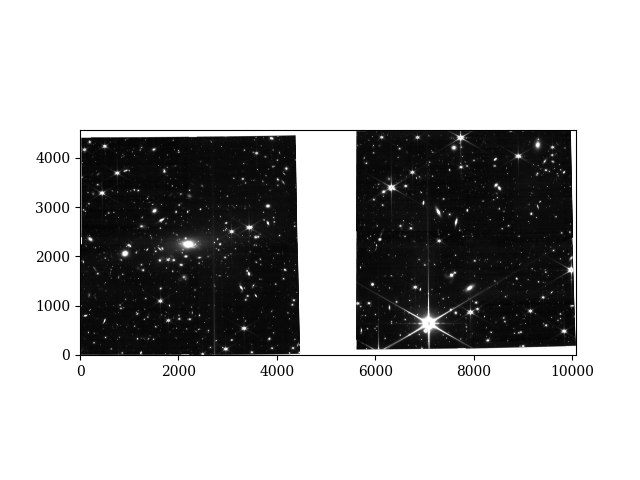

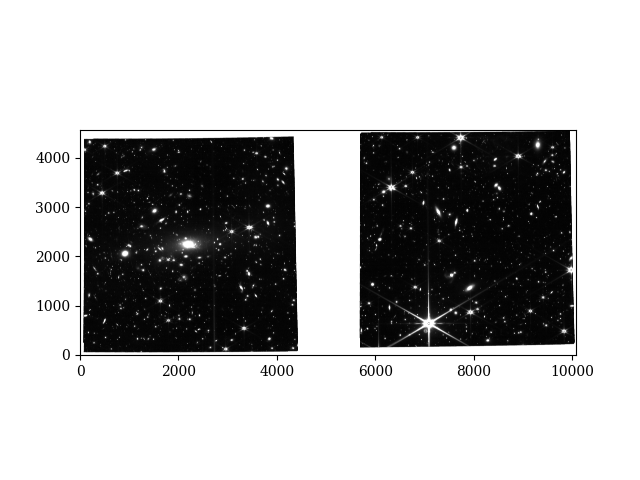

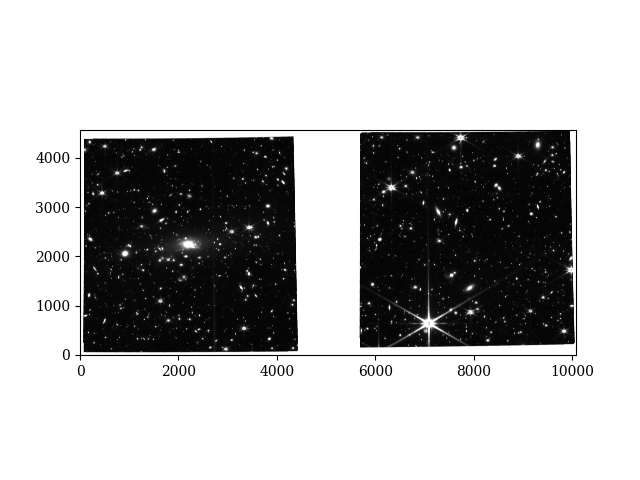

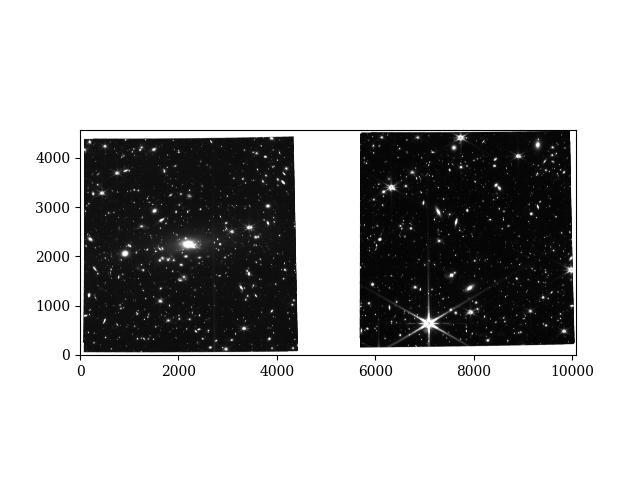

In [2]:
path = '/Users/zgl12/Python_Scripts/Image_Processing/MAST/MAST_2025-11-25T20_43_45.354Z/'

filters = ['f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f444w']

red = []
green = []
blue = []

data_list = []
wcs_list = []

for i in range(len(filters)):
    
    filt = filters[i]
    name = f'jw06882-o038_t041_nircam_clear-{filt}_i2d.fits'
    
    hdu = fits.open(path+name)
    data = hdu[1].data
    header = hdu[1].header
    wcs = WCS(header)
    # hdu.info()
    # print(repr(header))
    hdu.close()
    
    wcs_list.append(wcs)
    
    if i != 0:
        data, footprint = reproject_exact((data, wcs), wcs_list[0], shape_out=data_list[0].shape)

    data_list.append(data)
    
    wcs_list.append(wcs)
    
    if (i == 0) | (i == 1):
        blue.append(data)
    elif (i == 2) | (i == 3):
        green.append(data)
    else:
        red.append(data)
        
    plt.figure()
    plt.imshow(data, origin='lower', cmap='gray', vmin=np.nanpercentile(data, 1), vmax=np.nanpercentile(data, 99))
    plt.show()
# 

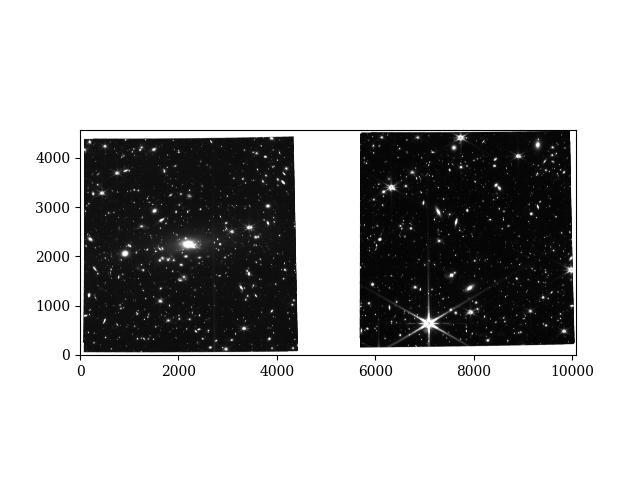

In [3]:
plt.figure()
plt.imshow(data, origin='lower', cmap='gray', vmin=np.nanpercentile(data, 1), vmax=np.nanpercentile(data, 99))
plt.show()

In [ ]:
for r in red:
    print(r.shape)

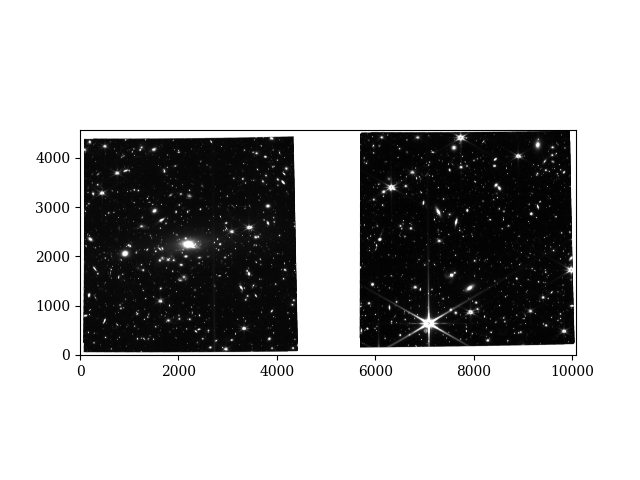

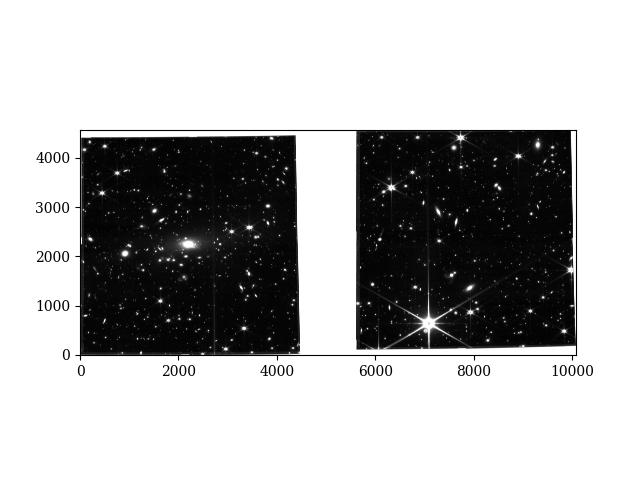

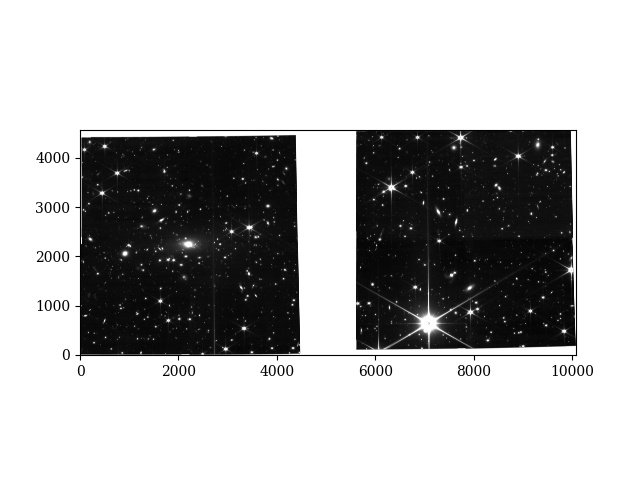

In [4]:
red_data = np.nanmean(red, axis=0)
green_data = np.nanmean(green, axis=0)
blue_data = np.nanmean(blue, axis=0)

np.save('sneos_red.npy', red_data)
np.save('sneos_green.npy', green_data)
np.save('sneos_blue.npy', blue_data)

plt.figure()
plt.imshow(red_data, origin='lower', cmap='gray', vmin=np.nanpercentile(red_data, 1), vmax=np.nanpercentile(red_data, 99))
plt.show()

plt.figure()
plt.imshow(green_data, origin='lower', cmap='gray', vmin=np.nanpercentile(green_data, 1), vmax=np.nanpercentile(green_data, 99))
plt.show()

plt.figure()
plt.imshow(blue_data, origin='lower', cmap='gray', vmin=np.nanpercentile(blue_data, 1), vmax=np.nanpercentile(blue_data, 99))
plt.show()

In [ ]:
data_list = [red_data, green_data, blue_data]

In [ ]:
rgb = RGB(data_list,
          save = False, save_name = 'snEos', save_folder = '/Users/zgl12/', 
          epsf_plot=False, epsf = False,
          bkg_plot = False, temp_save = True, run = False, manual_override=0)

In [ ]:
colour = rgb.master_plot(data_list, 
                         colours = ['red', 'green', 'blue'],
                         intensities = [0.6, 1, 0.56], 
                         gamma = [1.2, 1.2, 1.2],
                         norms = ['asinh', 'asinh', 'asinh'], 
                         uppers = [98.5, 98.5, 98.5],
                         lowers = [45, 45, 45], 
                         interactive=False)

In [ ]:
np.save('/Users/zgl12/sneos_rgb.npy', colour)

In [ ]:
plt.figure()
plt.imshow(colour, origin='lower')
plt.xlim(500, 4000)
plt.ylim(500, 4000)
plt.show()